Question 1




For a matrix A($n\times k$) and matrix B($k\times m$), the resultant matrix C will be of order ($n\times m$). An element at (i,j) in martix C is obtained by the multiplication of the ith row of A with the jth column of B. This will involve the sum of individual element by element multiplication. Thus there are k multiplications involved and k-1 additions involved. This process needs to be repeated $n*m$ times to fill all the elements of matrix C. Hence there will be a total of $k*n*m$ multiplications and $(k-1)*n*m$ additions involved. The total number of additions + mupltiplications will be $(2k-1)*n*m$.

Question 2

Assuming n=3, k=4 and m=5


In [33]:
A=[
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
]

B= [
    [13, 14, 15, 16, 17],
    [18, 19, 20, 21, 22],
    [23, 24, 25, 26, 27],
    [28, 29, 30, 31, 32]
]



In [34]:
#Using lists of lists
final_mat=[[0 for _ in range(5)] for _ in range(3)]

for i in range(len(A)):
  for j in range(len(B[0])):
    for k in range(len(B)):
      final_mat[i][j]+=A[i][k]*B[k][j]

for row in final_mat:
    print(row)


[230, 240, 250, 260, 270]
[558, 584, 610, 636, 662]
[886, 928, 970, 1012, 1054]


In [35]:
#Using numpy
import numpy as np
a=np.array(A)
b=np.array(B)
c=np.dot(a,b)

print(c)

[[ 230  240  250  260  270]
 [ 558  584  610  636  662]
 [ 886  928  970 1012 1054]]


The list of lists took more time to execute than the numpy solution. This is because numpy is implemented in C and hence is optimised for numerical operations as compared to list of lists, which relies of nested loops in pure python

Question 3

Following the method given, it will take $n/2$ passes to find the median and every pass will be O($n$). Hence the complexity will be O($n^2$). If the array can be sorted initally, then it will only take O($1$) to find the median, but it will take O($nlogn$) to sort the array, hence the complexity will be O($nlogn$) which is better than O($n^2$).

In [36]:
#For finding the median using the kth largest method, you have to find (n+1)/2 th largest element
arr=[3,5,1,7,8]
copy_arr=arr.copy()
n = len(arr)
k = int(((n + 1)/2))



max_value = float('-inf')
max_index = -1

for _ in range(k):
        max_value = float('-inf')
        max_index = -1
        for i, num in enumerate(arr):
            if num > max_value:
                max_value = num
                max_index = i
        # After finding the maximum, set it to negative infinity
        # so that it won't be considered again in the next iteration
        arr[max_index] = float('-inf')




# Print the final value after the loop
print(max_value)

#n^2 complexity


5


In [37]:
#By sorting the array using built in sort function
sorted_arr=sorted(copy_arr)
#Now the median is simply the middle element
print(sorted_arr[2])
#nlogn complexity

5


In [38]:
#Now using numpy median
import numpy as np
array=np.array(copy_arr)
median=np.median(array)
print(median)


5.0


The complexity of numpy.median is $nlogn$ which is roughly the same as using the sorted method but is better than the first method in terms of time

Question 4

First we can compute the gradient analytically using finite difference

In [39]:
def f(x,y):
  return (x**2)*y + (y**3)*(np.sin(x))

x=0.41845703125
y=0.41845703125
delta=1e-6
d_f_x=(f(x+delta,y)-f(x-delta,y))/(2*delta)
d_f_y=(f(x,y+delta)-f(x,y-delta))/(2*delta)

print(f"Gradient with respect to x is {d_f_x}")
print(f"Gradient with respect to y is {d_f_y}")



Gradient with respect to x is 0.4171646921166672
Gradient with respect to y is 0.3885701842926137


Question 5

By using JAX

In [40]:
pip install jax jaxlib


In [41]:
import jax
import jax.numpy as jnp


def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)


grad_f = jax.grad(f, argnums=(0, 1))

key = jax.random.PRNGKey(0)

# Generate one random x and y
x_val = jax.random.uniform(key, shape=(1,))[0]  # Extracting the scalar value
y_val = jax.random.uniform(key, shape=(1,))[0]  # Extracting the scalar value
print(f"x and y values are: {x_val}, {y_val}")

jax_grad_x, jax_grad_y = grad_f(x_val, y_val)

print("Gradient with respect to x:", jax_grad_x)
print("Gradient with respect to y:", jax_grad_y)


x and y values are: 0.41845703125, 0.41845703125
Gradient with respect to x: 0.41716468
Gradient with respect to y: 0.3885702


For similar x and y values plugged into the finite difference method, results are approximately similar

Question 6

For the function $f(x)= x^2y + y^3sin(x)$, the gradients can be directly computed using sympy.

In [42]:
import sympy as sp


x,y =sp.symbols('x y')
f=(x**2)*y + (y**3)*(sp.sin(x))
df_dx=sp.diff(f,x)
df_dy=sp.diff(f,y)

x_value=0.41845703125
y_value=0.41845703125

df_dx_value = df_dx.subs({x: x_value, y: y_value})
df_dy_value = df_dy.subs({x: x_value, y: y_value})

print(f"Gradient with respect to x at x={x_value}, y={y_value}: {df_dx_value}")
print(f"Gradient with respect to y at x={x_value}, y={y_value}: {df_dy_value}")


Gradient with respect to x at x=0.41845703125, y=0.41845703125: 0.417164692126035
Gradient with respect to y at x=0.41845703125, y=0.41845703125: 0.388570184301915


The analytical solution matches the previous solutions approximately


Question 7

In [43]:
student_records = {
    2022: {
        'Branch 1': {
            'Roll Number': 1,
            'Name': 'N',
            'Marks': {
                'Maths': 100,
                'English': 70,
                'Science': 77,
            }
        },
        'Branch 2': {
            'Roll Number' : 4,
            'Name' : 'P',
            'Marks':{
                'Science':60,
            }
        }
    },
    2023: {
        'Branch 1': {},
        'Branch 2': {},
    },
    2024: {
        'Branch 1': {},
        'Branch 2': {},
    },
    2025: {
        'Branch 1': {},
        'Branch 2': {},
    },
}

# Accessing information
print("2022 Branch 2 Science Marks:", student_records[2022]['Branch 2']['Marks']['Science'])


2022 Branch 2 Science Marks: 60


In [44]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks  # Dictionary with subject as key and marks as value


class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []  # List of Student objects


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []  # List of Branch objects

student1 = Student(1, 'N', {'Maths': 100, 'English': 70})
student2= Student(2,'K',{'Maths' : 66, 'English': 45})
student3= Student(3,'C',{'EVS':99})

branch1_2022 = Branch('Branch 1')
branch1_2022.students.append(student1)
branch1_2022.students.append(student2)
branch1_2022.students.append(student3)


year_2022 = Year(2022)
year_2022.branches.append(branch1_2022)


# Overall database
database = [year_2022]
# Can add more years to the database as needed

# Accessing information
for year in database:
    print(f"Year: {year.year}")
    for branch in year.branches:
        print(f"  Branch: {branch.name}")
        for student in branch.students:
            print(f"    Student Name: {student.name}, Roll Number: {student.roll_number}")
            print("    Marks:")
            for subject, marks in student.marks.items():
                print(f"      {subject}: {marks}")


Year: 2022
  Branch: Branch 1
    Student Name: N, Roll Number: 1
    Marks:
      Maths: 100
      English: 70
    Student Name: K, Roll Number: 2
    Marks:
      Maths: 66
      English: 45
    Student Name: C, Roll Number: 3
    Marks:
      EVS: 99


Question 9

In [45]:
import matplotlib.pyplot as plt

x=np.arange(0.5,100.5,0.5)


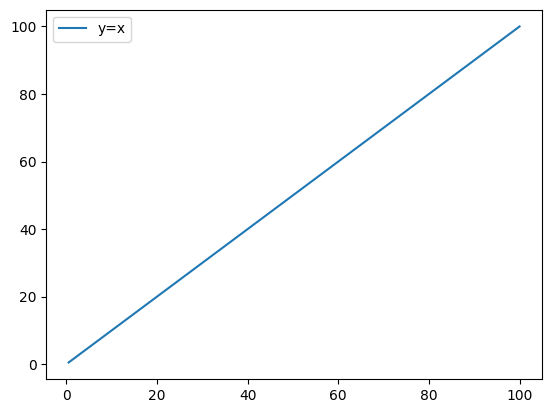

In [46]:
y=x
plt.plot(x,y,label='y=x')
plt.legend()


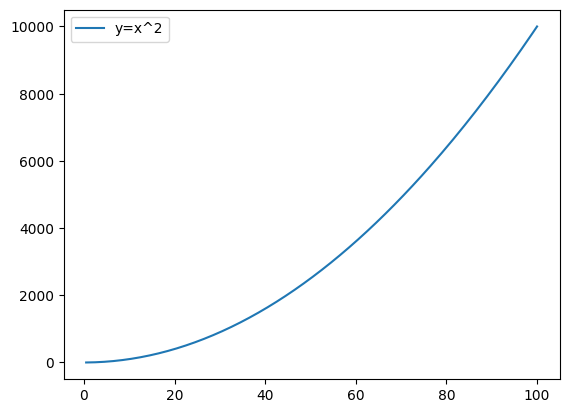

In [47]:
y=x**2
plt.plot(x,y,label='y=x^2')
plt.legend()

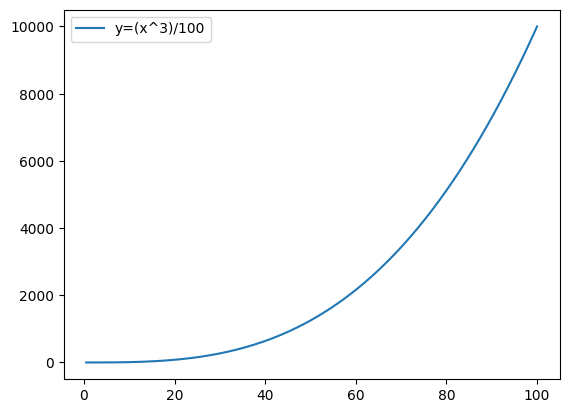

In [48]:
y=(x**3)/100
plt.plot(x,y,label='y=(x^3)/100')
plt.legend()

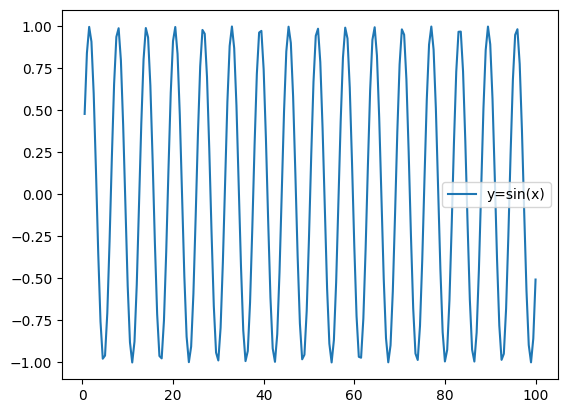

In [49]:
y=np.sin(x)
plt.plot(x,y,label='y=sin(x)')
plt.legend()

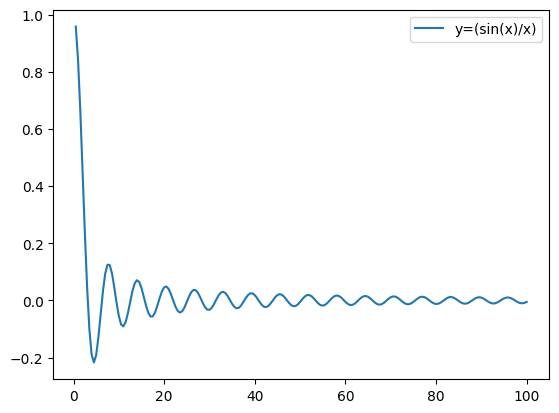

In [50]:
y=(np.sin(x))/x
plt.plot(x,y,label='y=(sin(x)/x)')
plt.legend()

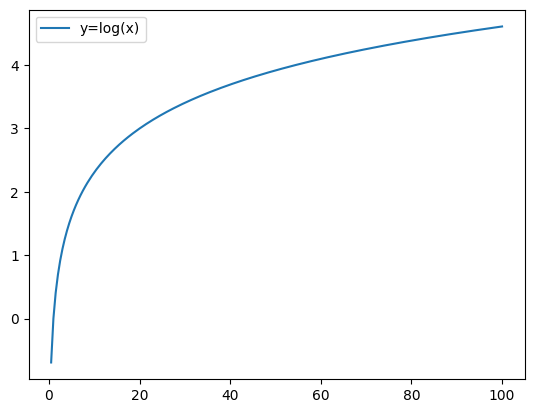

In [51]:
y=np.log(x)
plt.plot(x,y,label='y=log(x)')
plt.legend()

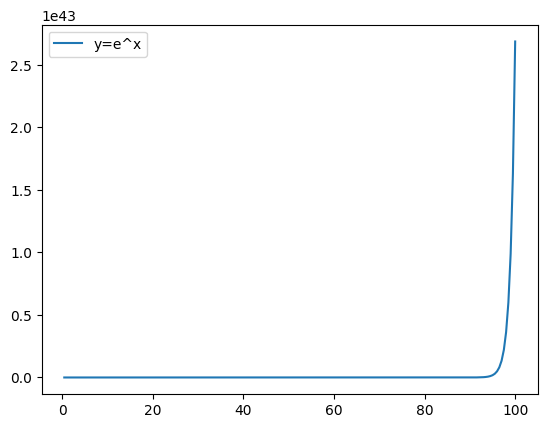

In [52]:
y=np.exp(x)
plt.plot(x,y,label='y=e^x')
plt.legend()

Question 10

In [53]:
import pandas as pd

In [54]:
random_matrix = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(random_matrix, columns=["a", "b", "c", "d", "e"])
max_std_column = df.std().idxmax()
min_mean_row = df.mean(axis=1).idxmin()

print("DataFrame:")
print(df)
print("\nColumn with the highest standard deviation:", max_std_column)
print("Row with the lowest mean:", min_mean_row)

DataFrame:
           a         b         c         d         e
0   1.519449  1.929044  1.967040  1.586518  1.653701
1   1.265974  1.286529  1.999112  1.105597  1.715098
2   1.889205  1.354926  1.400948  1.074944  1.497625
3   1.205823  1.095371  1.665783  1.307438  1.063853
4   1.954734  1.989519  1.896578  1.765584  1.894729
5   1.393933  1.114390  1.728335  1.679570  1.671178
6   1.942408  1.563804  1.912887  1.949266  1.841374
7   1.209236  1.107371  1.746973  1.591884  1.171758
8   1.867043  1.382349  1.635398  1.760277  1.948472
9   1.835999  1.760732  1.879830  1.016282  1.745796
10  1.335549  1.216016  1.502922  1.969925  1.876729
11  1.028597  1.946739  1.637748  1.861087  1.296387
12  1.486049  1.943107  1.801520  1.908607  1.295383
13  1.674701  1.487547  1.413358  1.929243  1.950354
14  1.427806  1.094278  1.668330  1.917099  1.257932
15  1.644748  1.148397  1.627091  1.126404  1.304792
16  1.713607  1.928493  1.138968  1.971108  1.427005
17  1.818341  1.183574  1.747395  1

Question 11

In [55]:
df['f'] = df.sum(axis=1)
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
num_rows_LT8 = len(df[df['g'] == 'LT8'])
std_dev_LT8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_dev_GT8 = df.loc[df['g'] == 'GT8', 'f'].std()

print("\nNumber of rows where 'g' is 'LT8':", num_rows_LT8)
print("Standard deviation of 'f' for 'LT8':", std_dev_LT8)
print("Standard deviation of 'f' for 'GT8':", std_dev_GT8)


Number of rows where 'g' is 'LT8': 11
Standard deviation of 'f' for 'LT8': 0.5496216721237978
Standard deviation of 'f' for 'GT8': 0.46732896813871627


Question 12

When two numpy arrays of different shapes are added, the smaller array is extended to match the shape of the larger array without the need of explicitly replicating the row vector through the use of loops. Here's an example:

In [56]:
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])
row_vector = np.array([10, 20, 30])
result = matrix + row_vector

print("Original Matrix:")
print(matrix)
print("\nRow Vector:")
print(row_vector)
print("\nResult after Broadcasting:")
print(result)

Original Matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Row Vector:
[10 20 30]

Result after Broadcasting:
[[11 22 33]
 [14 25 36]
 [17 28 39]]


In [57]:
import sys

Question 13

In [58]:
def argmin(arr):
  min=sys.maxsize
  min_ind=0

  for i,num in enumerate(arr):
    if num<min:
      min=num
      min_ind=i

  return min_ind



In [59]:
arr=[5,7,2,9,66,1,303,287,5,6]
nparr=np.array([5,7,2,9,66,1,303,287,5,6])

f_min=argmin(arr)
r_min=np.argmin(nparr)
print(f"Index of minimum element using the function is {f_min} and using the np.argmin() is {r_min}")

Index of minimum element using the function is 5 and using the np.argmin() is 5
